In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/bbrauser/Churn_Analysis/main/data/churn_data.csv')

In [18]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Basic Analysis

## What is the overall churn rate?

In [19]:
# Calculate the overall churn rate (0 = No, 1 = Yes)
overall_churn_rate = df['Churn'].value_counts(normalize=True)['Yes']

print(f"The overall churn rate is: {overall_churn_rate:.2%}")

The overall churn rate is: 26.54%


## How does the churn rate differ between make and female customers?

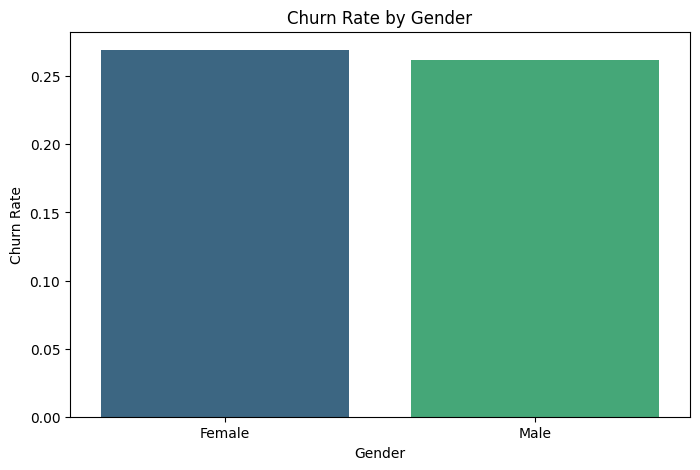

Churn Rate by Gender:
Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate churn rate by gender (Female = 0, Male = 1)
churn_by_gender = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()

# Plot the churn rate by gender
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_gender.index, y=churn_by_gender['Yes'], palette='viridis')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

# Display churn rates in numerical form
print("Churn Rate by Gender:")
print(churn_by_gender)

## What is the average tenure of customers who churned?

In [21]:
# Calculate the average tenure for customers who churned
average_tenure_churned = df[df['Churn'] == 'Yes']['tenure'].mean()

# Display the result
print(f"The average tenure of customers who churned is: {average_tenure_churned:.2f} months")

The average tenure of customers who churned is: 17.98 months


## Is there a correlation between monthly charges and churn?

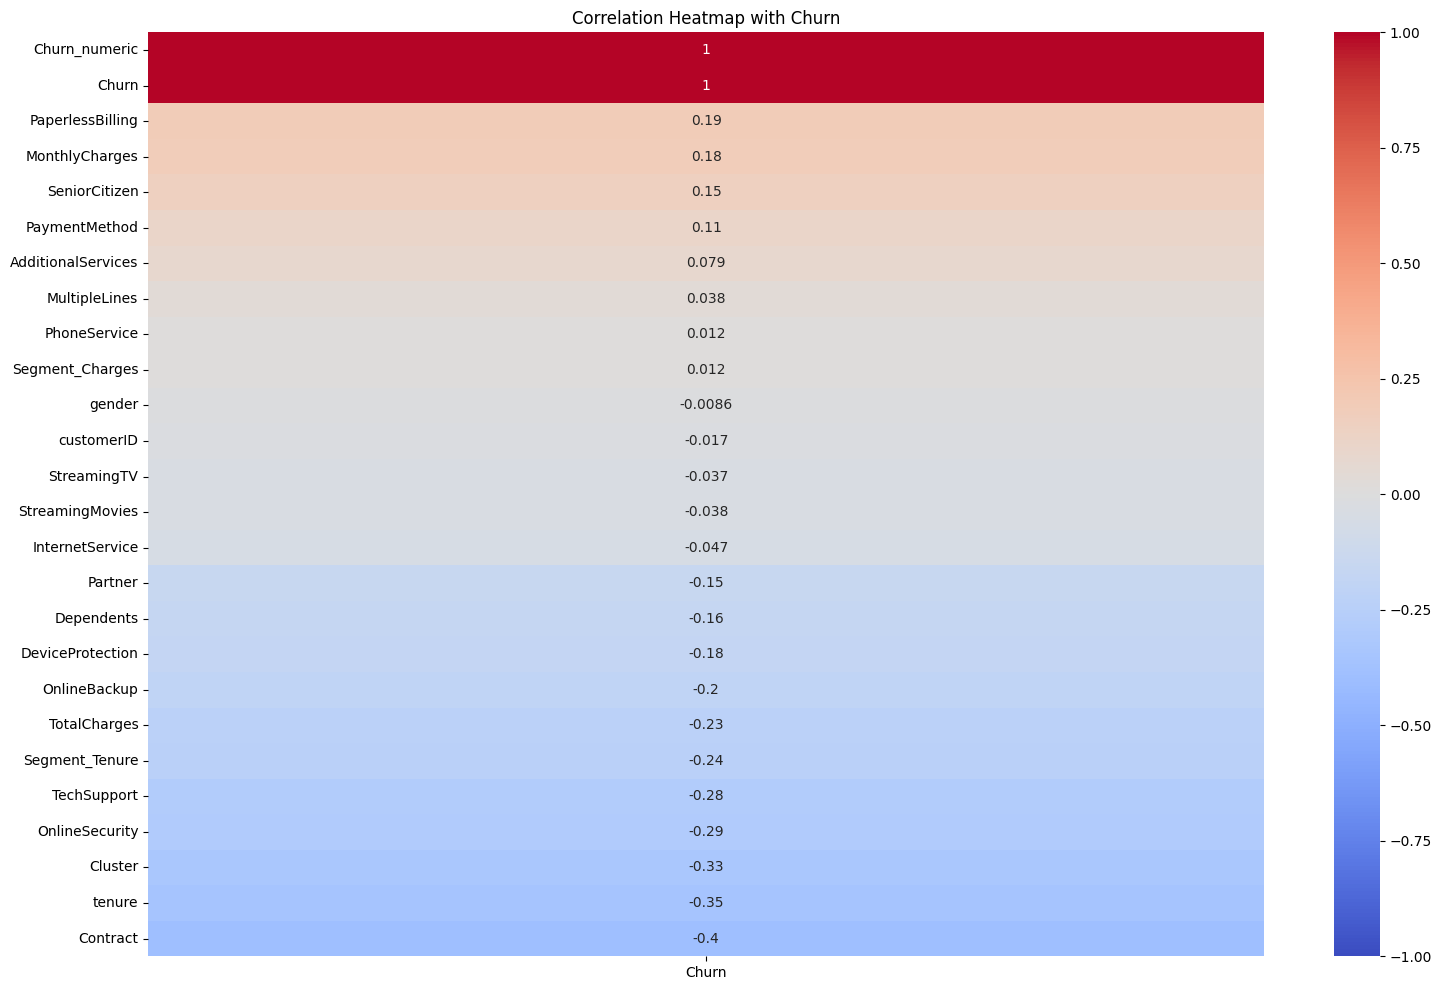

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables into numeric values
df_encoded = df.apply(LabelEncoder().fit_transform)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix[['Churn']].sort_values(by='Churn', ascending=False),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)
plt.title('Correlation Heatmap with Churn')
plt.show()

# Intermediate Questions

## How does the churn rate vary across different contract types?

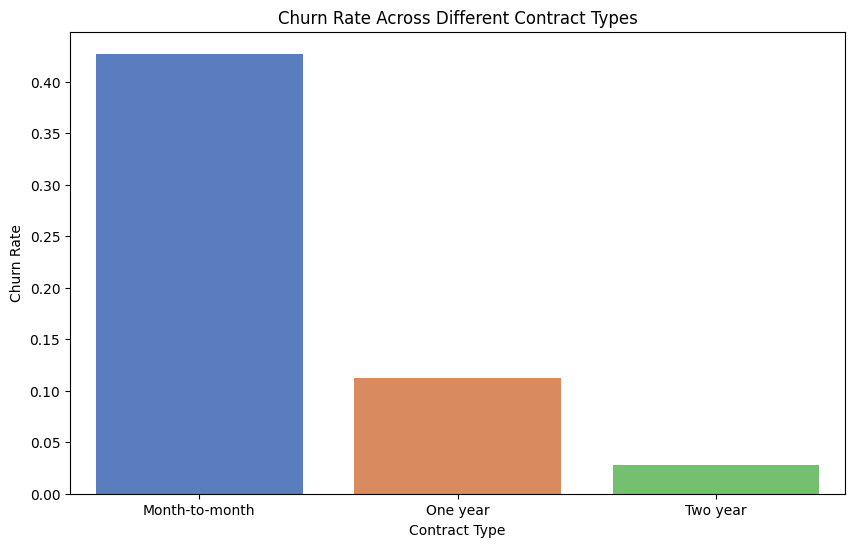

In [23]:
# Calculate churn rate by contract type
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

# Visualize the churn rate across different contract types
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_contract.index, y=churn_by_contract['Yes'], palette='muted')
plt.title('Churn Rate Across Different Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()

## Are customers with additional services (e.g., StreamingTV, StreamingMovies) less likely to churn?

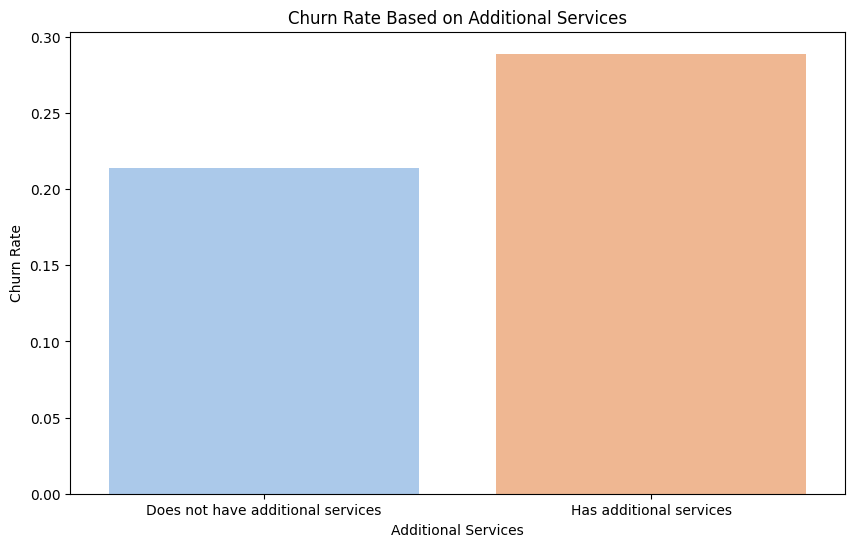

In [24]:
# List of additional services
additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a new column 'AdditionalServices' indicating if a customer has any additional service
df['AdditionalServices'] = df[additional_services].apply(lambda row: 'Has additional services' if any(row == 'Yes') else 'Does not have additional', axis=1)

# Calculate churn rate based on the presence of additional services
churn_by_services = df.groupby('AdditionalServices')['Churn'].value_counts(normalize=True).unstack()

# Visualize the churn rate based on additional services
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_services.index, y=churn_by_services['Yes'], palette='pastel')
plt.title('Churn Rate Based on Additional Services')
plt.xlabel('Additional Services')
plt.ylabel('Churn Rate')
plt.show()

## Does the method of payment influence churn rates?

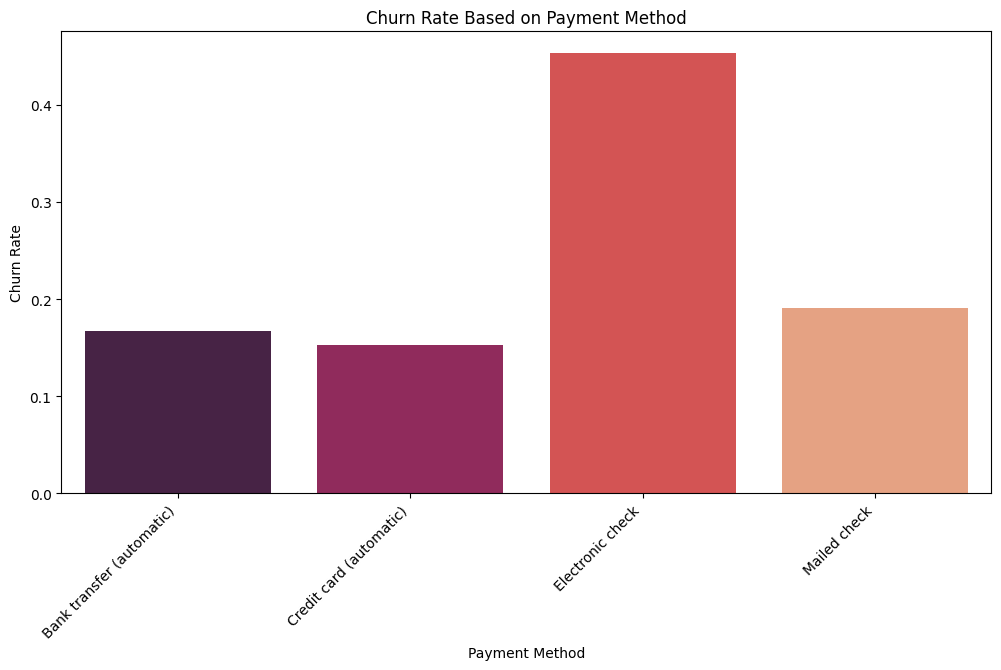

In [25]:
# Calculate churn rate by payment method
churn_by_payment = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()

# Visualize the churn rate based on payment method
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_by_payment.index, y=churn_by_payment['Yes'], palette='rocket')
plt.title('Churn Rate Based on Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

## What is the distribution of tenure for customers who churned within the first year?

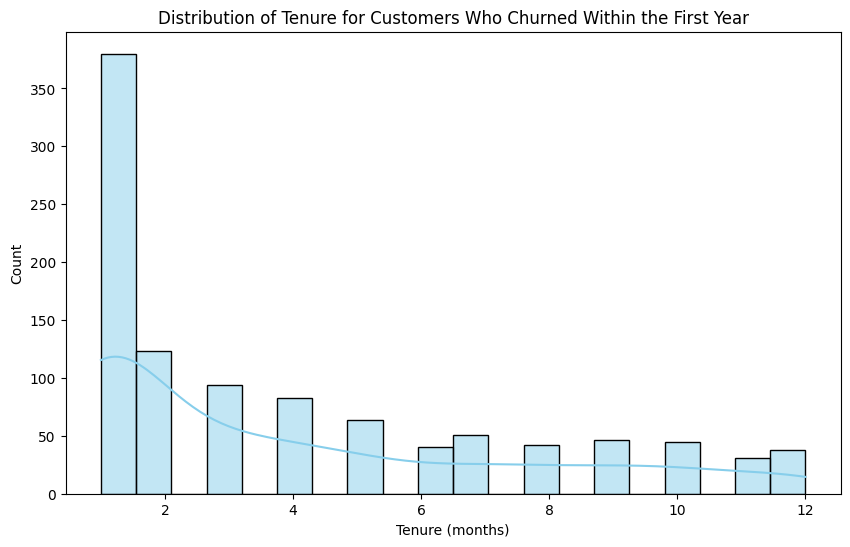

In [26]:
# Filter customers who churned within the first year
churned_first_year = df[(df['Churn'] == 'Yes') & (df['tenure'] <= 12)]

# Visualize the distribution of tenure
plt.figure(figsize=(10, 6))
sns.histplot(churned_first_year['tenure'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tenure for Customers Who Churned Within the First Year')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

## Are there specific demographics (age, dependents) associated with higher churn rates?

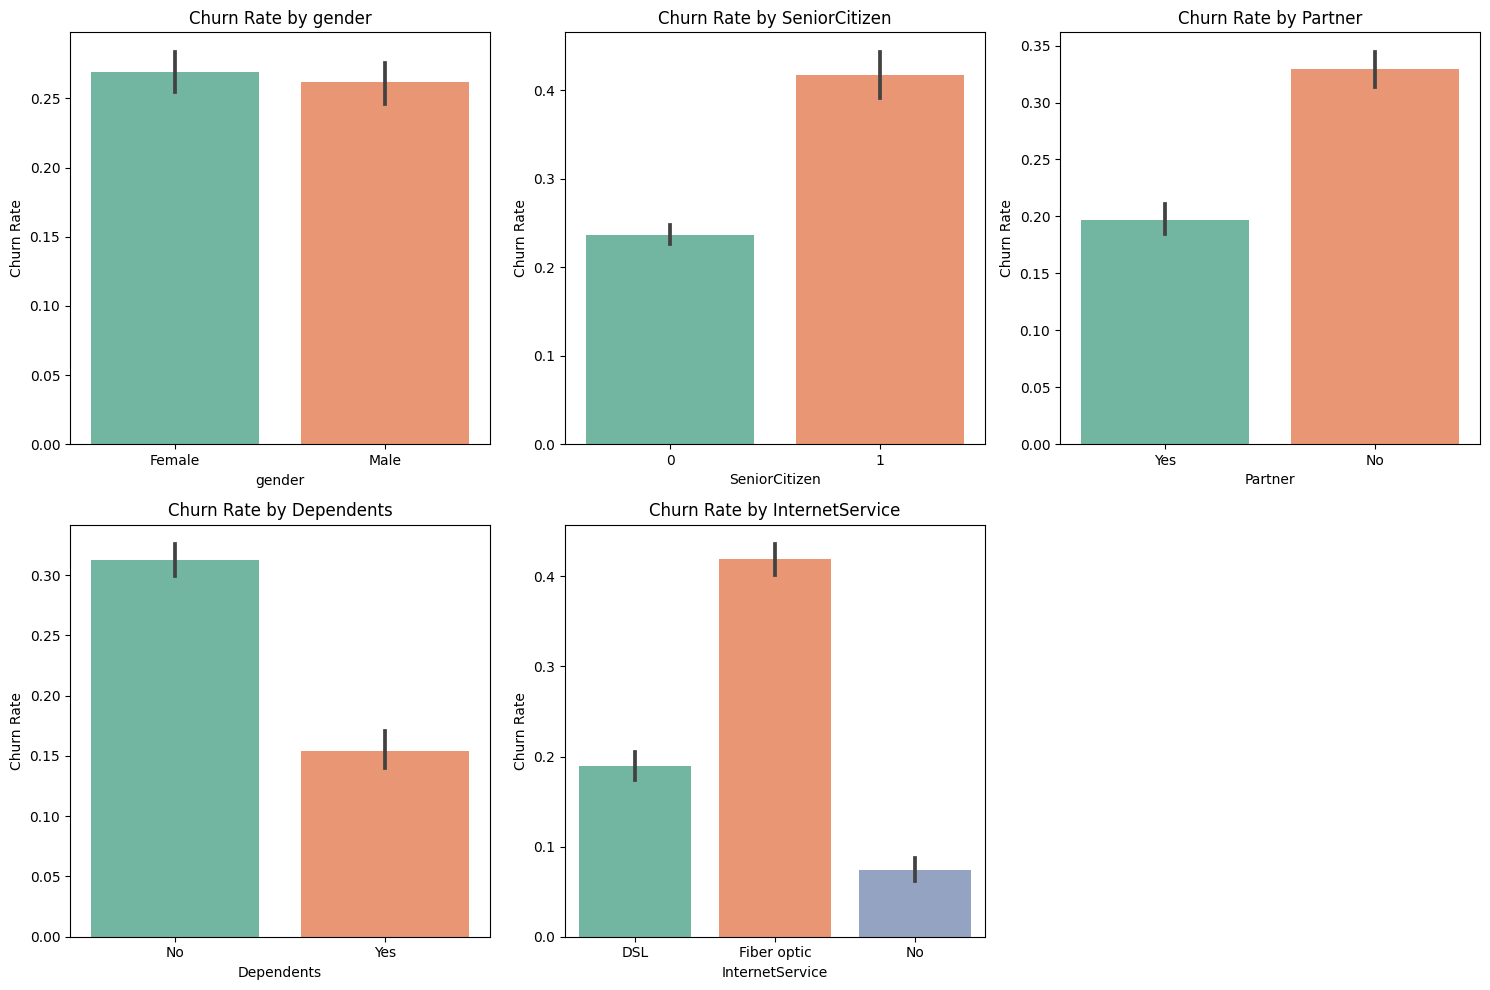

In [27]:
# Convert 'Churn' to numeric format (Yes: 1, No: 0)
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Categorical demographic variables
demographic_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService']

# Create subplots for each demographic variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(demographic_vars, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=var, y='Churn_numeric', data=df, palette='Set2')
    plt.title(f'Churn Rate by {var}')
    plt.xlabel(var)
    plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

# Advanced

## Can we predict churn based on a combination of features using machine learning?

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X_train = pd.read_csv('https://raw.githubusercontent.com/bbrauser/Churn_Analysis/main/data/X_train.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/bbrauser/Churn_Analysis/main/data/X_test.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/bbrauser/Churn_Analysis/main/data/y_train.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/bbrauser/Churn_Analysis/main/data/y_test.csv')

# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy with Best Model: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy with Best Model: 0.80
Confusion Matrix:
[[945  88]
 [195 179]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



## What is the customer lifetime value (CLV) for different segments?

### Tenure

In [29]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Create a 'Segment' column based on tenure ranges
tenure_bins = [0, 12, 24, 36, float('inf')]  # Define tenure ranges (in months)
tenure_labels = ['Low', 'Medium', 'High', 'Very High']  # Corresponding segment labels
df['Segment_Tenure'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Creating a 'Segment_Tenure' column
segments_tenure = df['Segment_Tenure'].unique()

for segment in segments_tenure:
    # Filter the dataset for the specific segment
    segment_data = df[df['Segment_Tenure'] == segment]

    # Calculate ARPU
    arpu = segment_data['TotalCharges'].sum() / len(segment_data)

    # Calculate Average Customer Lifespan (ACL)
    acl = segment_data['tenure'].mean()

    # Calculate CLV
    clv = arpu * acl

    print(f"Segment: {segment}")
    print(f"Average Revenue per Customer (ARPU): ${arpu:.2f}")
    print(f"Average Customer Lifespan (ACL): {acl:.2f} months")
    print(f"Customer Lifetime Value (CLV): ${clv:.2f}")
    print("\n")

Segment: Low
Average Revenue per Customer (ARPU): $252.80
Average Customer Lifespan (ACL): 4.32 months
Customer Lifetime Value (CLV): $1092.21


Segment: High
Average Revenue per Customer (ARPU): $1913.75
Average Customer Lifespan (ACL): 29.34 months
Customer Lifetime Value (CLV): $56140.90


Segment: Very High
Average Revenue per Customer (ARPU): $4183.32
Average Customer Lifespan (ACL): 57.49 months
Customer Lifetime Value (CLV): $240514.34


Segment: Medium
Average Revenue per Customer (ARPU): $1044.28
Average Customer Lifespan (ACL): 17.13 months
Customer Lifetime Value (CLV): $17893.43




### Monthly Charges

In [40]:
# Create a 'Segment' column based on MonthlyCharges ranges
charges_bins = [0, 30, 60, 90, float('inf')]  # Define MonthlyCharges ranges
charges_labels = ['Low', 'Medium', 'High', 'Very High']  # Corresponding segment labels
df['Segment_Charges'] = pd.cut(df['MonthlyCharges'], bins=charges_bins, labels=charges_labels, right=False)

# Creating a 'Segment_Tenure' column
segments_charges = df['Segment_Charges'].unique()

for segment in segments_charges:
    # Filter the dataset for the specific segment
    segment_data = df[df['Segment_Charges'] == segment]

    # Calculate ARPU
    arpu = segment_data['TotalCharges'].sum() / len(segment_data)

    # Calculate Average Customer Lifespan (ACL)
    acl = segment_data['tenure'].mean()

    # Calculate CLV
    clv = arpu * acl

    print(f"Segment: {segment}")
    print(f"Average Revenue per Customer (ARPU): ${arpu:.2f}")
    print(f"Average Customer Lifespan (ACL): {acl:.2f} months")
    print(f"Customer Lifetime Value (CLV): ${clv:.2f}")
    print("\n")

Segment: Low
Average Revenue per Customer (ARPU): $634.44
Average Customer Lifespan (ACL): 29.04 months
Customer Lifetime Value (CLV): $18424.12


Segment: Medium
Average Revenue per Customer (ARPU): $1199.39
Average Customer Lifespan (ACL): 24.29 months
Customer Lifetime Value (CLV): $29133.30


Segment: High
Average Revenue per Customer (ARPU): $2296.82
Average Customer Lifespan (ACL): 29.87 months
Customer Lifetime Value (CLV): $68605.89


Segment: Very High
Average Revenue per Customer (ARPU): $4592.56
Average Customer Lifespan (ACL): 44.77 months
Customer Lifetime Value (CLV): $205608.69




## Can we identify clusters of customers with similar churn behavior using unsupervised learning?

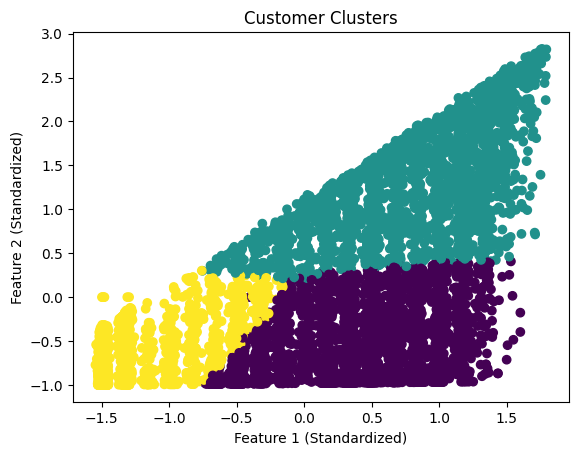

         MonthlyCharges  TotalCharges  tenure
Cluster                                      
0                 75.03       1033.97   13.26
1                 89.70       5246.13   58.56
2                 26.63        810.55   29.43


In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select relevant features for clustering (you might need to preprocess or choose different features)
features_for_clustering = ['MonthlyCharges', 'TotalCharges', 'tenure']

# Subset the data for clustering
X = df[features_for_clustering]

# Impute missing values (replace NaN with mean, median, or other strategies)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Choose the number of clusters (you may need to experiment or use other methods to determine the optimal number)
num_clusters = 3

# Set n_init explicitly to avoid the FutureWarning
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)  # Change the value of n_init as needed
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (in 2D, you may need to adapt for more features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

# Analyze cluster characteristics
cluster_means = df.groupby('Cluster')[features_for_clustering].mean().round(2)
print(cluster_means)